In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
import numpy as np

np.random.seed(42)



---



1. 데이터 로딩 및형태 파악(표) (20점)  
(a) 위URL에서pandas로 데이터를 로드한다. 기본결측 표기는NaN으로 인식되게한다.   
(b) shape, dtypes, info()의핵심을표 1(데이터 개요)로 정리한다. 열(변수) 수, 행(관측치)수를 명시한다.   
(c) head(5)를 표 2(상위5행 미리보기)로 제시한다.

In [ ]:
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguins_df = pd.read_csv(url)

In [ ]:
print("=== 표 1: 데이터 개요 ===")
print(f"행(관측치) 수: {n_rows}")
print(f"열(변수) 수: {n_cols}\n")
penguins_df.info()

=== 표 1: 데이터 개요 ===
행(관측치) 수: 344
열(변수) 수: 8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [ ]:
penguins_df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007




---



2. 기술통계표 작성 (20점)   
(a) 수치형열에 대해 평균, 표준편차, 최솟값, 사분위수(Q1/중앙값/Q3), 최댓값을표 3(수치형요약 통계)로 제시한다.   
(b) 타깃변수(종류, species)가문자열 다중클래스임을확인하고, 각클래스빈도를 표 4(클래스분포)로 제시한다.

In [ ]:
penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [ ]:
penguins_df['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


3. 시각화(그림) (20점)   
(a) 수치형변수하나를 선택하여 히스토그램을그린다(그림 1). 축 라벨과단위를 명확히 표기한다.   
(b) 타깃별(종별) 상자그림(boxplot)을그린다(그림 2). 각종의분포차이를 그림 캡션으로 간단히 해석한다.   
(c) 수치형변수두개를 선택하여 산점도를 그리고, 점색을종으로 구분한다(그림 3). 상관관계에 대한 한 문장코멘트를 	적는다.

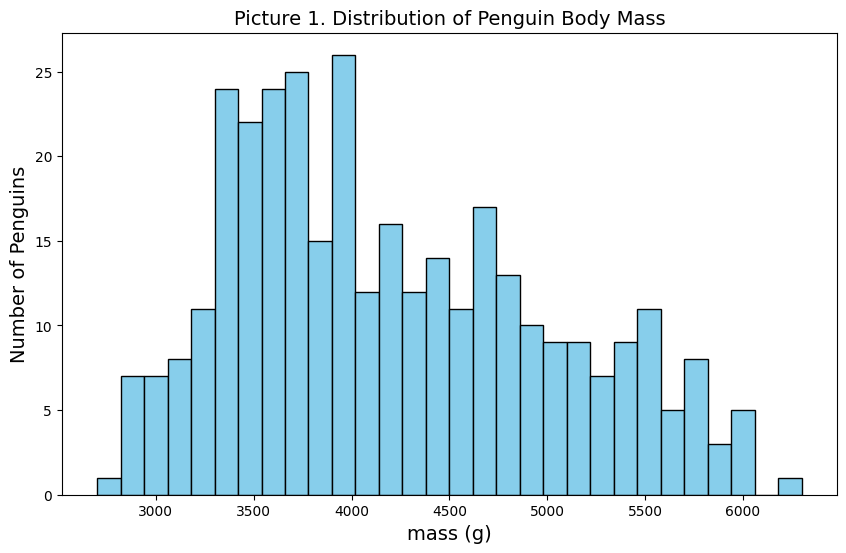

In [ ]:
data_to_plot = penguins_df['body_mass_g'].dropna()

# 2. 그래프 크기를 지정하고 히스토그램을 그립니다.
plt.figure(figsize=(10, 6))
plt.hist(data_to_plot, bins=30, color='skyblue', edgecolor='black')

# 3. 제목과 축 라벨을 명확하게 추가합니다.
plt.title('Picture 1. Distribution of Penguin Body Mass')
plt.xlabel('mass (g)')
plt.ylabel('Number of Penguins')

# 4. 그래프를 화면에 보여줍니다.
plt.show()


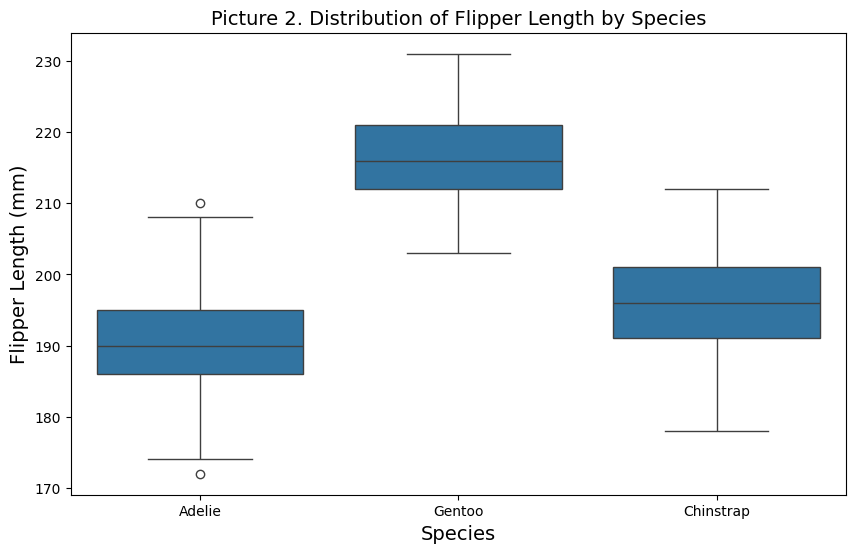

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='flipper_length_mm', data=penguins_df)
plt.title('Picture 2. Distribution of Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

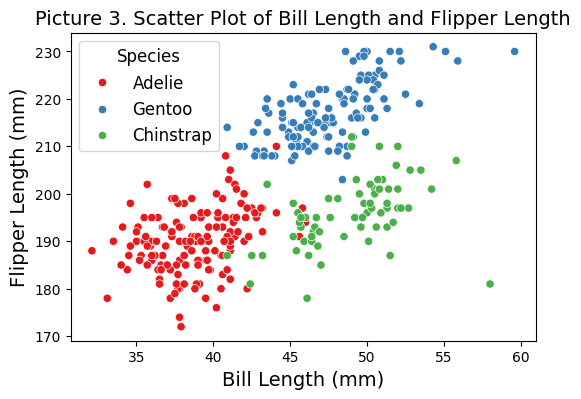

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=penguins,
    x="bill_length_mm",
    y="flipper_length_mm",
    hue="species",
    palette="Set1"
)
plt.xlabel("Bill Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.title("Picture 3. Scatter Plot of Bill Length and Flipper Length")
plt.legend(title="Species")
plt.show()



---



4. 결측치 처리 3가지: dropna, drop, fillna (20점)   
(a) 결측 분포파악: 각열의결측 개수와비율을표 5(결측 현황)으로 제시한다.   
(b) 방법1: dropna (행 제거) — 하나라도결측이있으면 해당행을제거하여 데이터셋D1를 만든다.  
 (c) 방법2: drop (열 제거) — 하나라도결측이있으면 해당열을제거하여 데이터셋D2을 만든다. 제거된열 목록을표로 제시한다.   
 (d) 방법3: fillna (단순대체) — 수치형은중앙값, 범주형은최빈값으로 fillna하여 데이터 셋D3를 만든다. 전/후결측 개수를 비교한다.

In [ ]:
missing_values = penguins_df.isnull().sum()
missing_percent = (missing_values / len(penguins_df) * 100).round(2)

# 표 5를 위한 데이터프레임 생성
missing_info = pd.DataFrame({
    '결측 개수': missing_values,
    '비율 (%)': missing_percent
})

print("--- 표 5. 결측 현황 ---")
print(missing_info[missing_info['결측 개수'] > 0])

--- 표 5. 결측 현황 ---
                   결측 개수  비율 (%)
bill_length_mm         2    0.58
bill_depth_mm          2    0.58
flipper_length_mm      2    0.58
body_mass_g            2    0.58
sex                   11    3.20


In [ ]:
D1 = penguins_df.dropna()

print(f"원본 데이터 행 개수: {penguins_df.shape[0]}")
print(f"D1 데이터 행 개수 (행 제거 후): {D1.shape[0]}")

원본 데이터 행 개수: 344
D1 데이터 행 개수 (행 제거 후): 333


In [ ]:
original_columns = penguins_df.columns
D2 = penguins_df.dropna(axis=1)
removed_columns = list(set(original_columns) - set(D2.columns))

print("--- 제거된 열 목록 ---")
print(pd.DataFrame(removed_columns, columns=['제거된 열']))
print(f"\n원본 데이터 열 개수: {penguins_df.shape[1]}")
print(f"D2 데이터 열 개수 (열 제거 후): {D2.shape[1]}")

--- 제거된 열 목록 ---
               제거된 열
0        body_mass_g
1     bill_length_mm
2      bill_depth_mm
3  flipper_length_mm
4                sex

원본 데이터 열 개수: 8
D2 데이터 열 개수 (열 제거 후): 3


In [ ]:
D3 = penguins_df.copy()
for col in D3.columns:
    if D3[col].isnull().any():
        if D3[col].dtype == 'object':
            mode_value = D3[col].mode()[0]
            D3[col] = D3[col].fillna(mode_value)
        else:
            median_value = D3[col].median()
            D3[col] = D3[col].fillna(median_value)

# --- 전/후 결측치 개수 비교 (출력 방식 수정) ---

print("--- 결측치 대체 전 ---")
# 원래 결측치가 있던 열만 보여줌
print(penguins_df.isnull().sum()[penguins_df.isnull().sum() > 0])

print("\n--- 결측치 대체 후 ---")
# 원래 결측치가 있던 열들의 현재 결측치 개수를 보여줌
print(D3.isnull().sum()[penguins_df.isnull().sum() > 0])


--- 결측치 대체 전 ---
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

--- 결측치 대체 후 ---
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64




---



5. 문자열 클래스를 수치형으로 바꾸기(10점)   
(a) Ordinal Encoder를 이용해 문자열 다중클래스를 수치형으로 바꾼다.  
 (b) One-Hot Encoder를 이용해 문자열 다중클래스를 수치형으로 바꾼다

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# 이전 단계에서 결측치를 채운 D3 데이터셋을 사용합니다.
# D3 = ... (fillna 코드 실행 후 데이터셋)

# OrdinalEncoder를 사용하기 위해 'species' 열을 선택합니다.
# 인코더는 2D 배열 입력을 기대하므로 대괄호를 두 번 사용합니다. [['species']]
species_cat = D3[['species']]

# ... (이전 코드와 동일) ...
ordinal_encoder = OrdinalEncoder()
species_encoded = ordinal_encoder.fit_transform(species_cat)

print("--- Ordinal Encoding ---")
# [:5] 부분을 제거하여 전체 배열을 출력
print(species_encoded)

--- Ordinal Encoding ---
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성 및 적용
onehot_encoder = OneHotEncoder()
species_onehot_encoded = onehot_encoder.fit_transform(species_cat)

print("--- One-Hot Encoding ---")
# [:5] 부분을 제거하여 전체 배열을 출력
print(species_onehot_encoded.toarray())

--- One-Hot Encoding ---
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 원본 데이터(결측치 포함)를 로드합니다.
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguins_df = pd.read_csv(url)

# 특성(X)과 타깃(y)을 분리합니다.
# dropna=False를 통해 결측치가 있는 타깃도 포함하여 비율을 맞춥니다.
X = penguins_df.drop('species', axis=1)
y = penguins_df['species']

# train_test_split을 사용해 층화 분할을 수행합니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("--- 데이터 분할 후 크기 ---")
print(f"훈련 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")

--- 데이터 분할 후 크기 ---
훈련 데이터 크기: (275, 7)
테스트 데이터 크기: (69, 7)


In [ ]:
# 각 데이터셋의 클래스 비율을 계산합니다.
original_dist = y.value_counts(normalize=True).sort_index()
train_dist = y_train.value_counts(normalize=True).sort_index()
test_dist = y_test.value_counts(normalize=True).sort_index()

# 비교를 위한 표를 만듭니다.
comparison_df = pd.DataFrame({
    'Original (%)': (original_dist * 100).round(2),
    'Train (%)': (train_dist * 100).round(2),
    'Test (%)': (test_dist * 100).round(2)
})

print("\n--- 분할 후 클래스 분포 비교 ---")
print(comparison_df)


--- 분할 후 클래스 분포 비교 ---
           Original (%)  Train (%)  Test (%)
species                                     
Adelie            44.19      44.36     43.48
Chinstrap         19.77      19.64     20.29
Gentoo            36.05      36.00     36.23


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 로드 (결측 포함)
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
penguins = pd.read_csv(url, na_values="NaN")

# (a) stratify=타깃(species), test_size=0.2, random_state=42
train_set, test_set = train_test_split(
    penguins,
    test_size=0.2,
    stratify=penguins["species"],
    random_state=42
)

print("원본 데이터 크기:", penguins.shape)
print("훈련 세트 크기:", train_set.shape)
print("테스트 세트 크기:", test_set.shape)

# (b) 클래스 분포 비교
train_dist = train_set["species"].value_counts(normalize=True) * 100
test_dist = test_set["species"].value_counts(normalize=True) * 100
orig_dist = penguins["species"].value_counts(normalize=True) * 100

summary = pd.DataFrame({
    "원본(%)": orig_dist.round(2),
    "훈련(%)": train_dist.round(2),
    "테스트(%)": test_dist.round(2)
})

print("\n=== 클래스 분포 (비교) ===")
print(summary)


원본 데이터 크기: (344, 8)
훈련 세트 크기: (275, 8)
테스트 세트 크기: (69, 8)

=== 클래스 분포 (비교) ===
           원본(%)  훈련(%)  테스트(%)
species                        
Adelie     44.19  44.36   43.48
Gentoo     36.05  36.00   36.23
Chinstrap  19.77  19.64   20.29
